In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
training_set = pd.read_csv('C:/Users/subar/Downloads/CMPE-255 Sec 99 - Data Mining/Home Works/HW3_Submission/train.csv')
test_set = pd.read_csv('C:/Users/subar/Downloads/CMPE-255 Sec 99 - Data Mining/Home Works/HW3_Submission/test.csv')
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
training_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
test_set.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [41]:
#Cabin to Deck
# make a list of all the posible Decks, the last element is used when no cabin code is present
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
#define a function that replaces the cabin code with the deck character
def search_substring(big_string, substring_list):
    for substring in substring_list:
        if substring in big_string:
            return substring
    return substring_list[-1]

In [42]:
# replace passenger's name with his/her title (Mr, Mrs, Miss, Master)
def get_title(string):
    import re
    regex = re.compile(r'Mr|Don|Major|Capt|Jonkheer|Rev|Col|Dr|Mrs|Countess|Dona|Mme|Ms|Miss|Mlle|Master', re.IGNORECASE)
    results = regex.search(string)
    if results != None:
        return(results.group().lower())
    else:
        return(str(np.nan))

In [43]:
# dictionary to map to generate the new feature vector
title_dictionary = {
    "capt":"Officer", 
    "col":"Officer", 
    "major":"Officer", 
    "dr":"Officer",
    "jonkheer":"Royalty",
    "rev":"Officer",
    "countess":"Royalty",
    "dona":"Royalty",
    "lady":"Royalty",
    "don":"Royalty",
    "mr":"Mr",
    "mme":"Mrs",
    "ms":"Mrs",
    "mrs":"Mrs",
    "miss":"Miss",
    "mlle":"Miss",
    "master":"Master",
    "nan":"Mr"
}

In [44]:
training_set['Deck'] = training_set['Cabin'].map(lambda x: search_substring(str(x), cabin_list))
test_set['Deck'] = test_set['Cabin'].map(lambda x: search_substring(str(x), cabin_list))
# delete the Cabin feature
training_set.drop('Cabin', 1, inplace=True)
test_set.drop('Cabin', 1, inplace=True)

training_set['Title'] = training_set['Name'].apply(get_title)
test_set['Title'] = test_set['Name'].apply(get_title)
training_set['Title'] = training_set['Title'].map(title_dictionary)
test_set['Title'] = test_set['Title'].map(title_dictionary)
# delete the Name feature
training_set.drop('Name', 1, inplace=True)
test_set.drop('Name', 1, inplace=True)

In [45]:
training_set.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title
886,887,0,2,male,27.0,0,0,211536,13.00,S,Unknown,Officer
887,888,1,1,female,19.0,0,0,112053,30.00,S,B,Miss
888,889,0,3,female,NaN,1,2,W./C. 6607,23.45,S,Unknown,Miss
889,890,1,1,male,26.0,0,0,111369,30.00,C,C,Mr
890,891,0,3,male,32.0,0,0,370376,7.75,Q,Unknown,Mr


In [46]:
#dropping ticket column
training_set.drop('Ticket', 1, inplace=True)
test_set.drop('Ticket', 1, inplace=True)

In [47]:
means_title = training_set.groupby('Title')['Age'].mean()

In [48]:
title_list = ['Mr','Miss','Mrs','Master', 'Royalty', 'Officer']
def age_nan_replace(means, dframe, title_list):
    for title in title_list:
        temp = dframe['Title'] == title #extract indices of samples with same title
        dframe.loc[temp, 'Age'] = dframe.loc[temp, 'Age'].fillna(means[title]) # replace nan values for mean
        

age_nan_replace(means_title, training_set, title_list)
age_nan_replace(means_title, test_set, title_list)

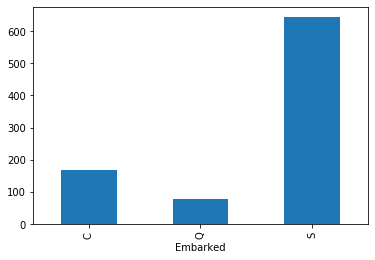

In [49]:
training_set.groupby('Embarked').size().plot(kind='bar')

In [66]:
training_set['Embarked'].fillna('S', inplace=True)
test_set['Embarked'].fillna('S', inplace=True)
#fill the fare column in the test set
test_set['Fare'].fillna(test_set['Fare'].mean(), inplace=True)

KeyError: 'Embarked'

In [51]:
training_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Unknown,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,C,Mr
2,3,1,3,female,26.0,0,0,7.9250,S,Unknown,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,C,Mr
4,5,0,3,male,35.0,0,0,8.0500,S,Unknown,Mr


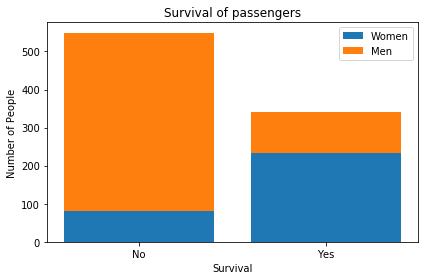

In [52]:
index = training_set['Survived'].unique() # get the number of bars
grouped_data = training_set.groupby(['Survived', 'Sex']) 
temp = grouped_data.size().unstack() 
women_stats = (temp.iat[0,0], temp.iat[1,0])
men_stats = (temp.iat[0,1], temp.iat[1,1])
p1 = plt.bar(index, women_stats)
p2 = plt.bar(index, men_stats, bottom=women_stats)
plt.xticks(index, ('No', 'Yes'))
plt.ylabel('Number of People')
plt.xlabel('Survival')
plt.title('Survival of passengers')
plt.legend((p1[0], p2[0]), ('Women', 'Men'))
plt.tight_layout()

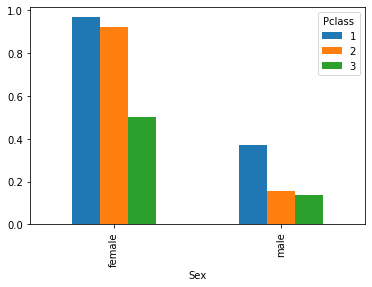

In [53]:
training_set.pivot_table('Survived',index='Sex',columns='Pclass').plot(kind='bar')

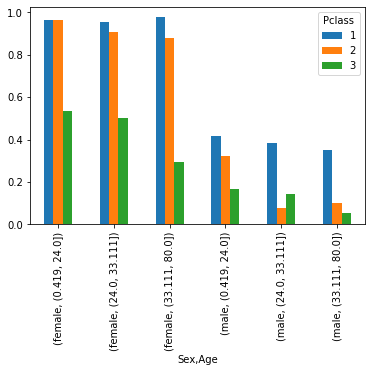

In [54]:
age_intervals = pd.qcut(training_set['Age'], 3)
training_set.pivot_table('Survived', ['Sex', age_intervals], 'Pclass').plot(kind='bar')

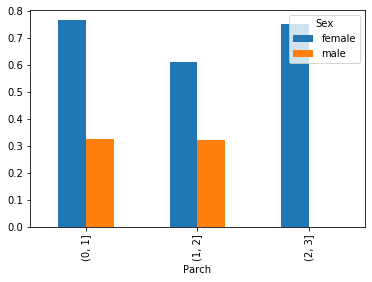

In [55]:
parch_intervals = pd.cut(training_set['Parch'], [0,1,2,3])
sibsp_intervals = pd.cut(training_set['SibSp'], [0,1,2,3])
training_set.pivot_table('Survived', parch_intervals, 'Sex').plot(kind='bar')

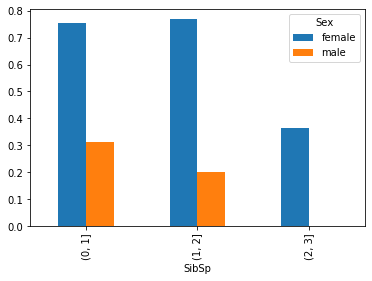

In [56]:
training_set.pivot_table('Survived', sibsp_intervals, 'Sex').plot(kind='bar')

In [57]:
training_set['Family Size'] = training_set['Parch'] + training_set['SibSp']
test_set['Family Size'] = test_set['Parch'] + test_set['SibSp']
training_set.drop('Parch', axis=1, inplace=True)
training_set.drop('SibSp', axis=1, inplace=True)
test_set.drop('Parch', axis=1, inplace=True)
test_set.drop('SibSp', axis=1, inplace=True)
training_set.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Title,Family Size
0,1,0,3,male,22.0,7.2500,S,Unknown,Mr,1
1,2,1,1,female,38.0,71.2833,C,C,Mr,1
2,3,1,3,female,26.0,7.9250,S,Unknown,Miss,0
3,4,1,1,female,35.0,53.1000,S,C,Mr,1
4,5,0,3,male,35.0,8.0500,S,Unknown,Mr,0


In [58]:
from sklearn.preprocessing import StandardScaler

numericals_list = ['Age','Fare']
for column in numericals_list:
    sc = StandardScaler(with_mean=True, with_std=True)
#    print(training_set[column].size)
#    print(test_set[column].size)
    sc.fit(training_set[column].values.reshape(-1,1))
    training_set[column] = sc.transform(training_set[column].values.reshape(-1,1))
    test_set[column] = sc.transform(test_set[column].values.reshape(-1,1))

In [59]:
from sklearn.preprocessing import LabelEncoder
categorical_classes_list = ['Sex','Embarked','Deck', 'Title'] #Pclass is already encoded
#encode features that are cateorical classes
encoding_list = []
for column in categorical_classes_list:
    le = LabelEncoder()
    le.fit(training_set[column])
    encoding_list.append(training_set[column].unique())
    encoding_list.append(list(le.transform(training_set[column].unique())))
    training_set[column] = le.transform(training_set[column])
    test_set[column] = le.transform(test_set[column])

In [60]:
# lets see the results
training_set.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Title,Family Size
0,1,0,3,1,-0.587428,-0.502445,2,8,2,1
1,2,1,1,0,0.617618,0.786845,0,2,2,1
2,3,1,3,0,-0.286167,-0.488854,2,8,1,0
3,4,1,1,0,0.391672,0.420730,2,2,2,1
4,5,0,3,1,0.391672,-0.486337,2,8,2,0


In [61]:
training_set = pd.get_dummies(training_set, columns=['Embarked','Pclass','Title', 'Deck'])
test_set = pd.get_dummies(test_set, columns=['Embarked','Pclass','Title', 'Deck'])

In [68]:
test_set.head()

,Age,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8,...,Pclass_1,Pclass_2,Pclass_3,Sex,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5
0,0.354014,0,0,0,0,0,0,0,0.0,1,...,0,0,1,1,0,0,1,0,0,0
1,1.295457,0,0,0,0,0,0,0,0.0,1,...,0,0,1,0,0,0,1,0,0,0
2,2.425187,0,0,0,0,0,0,0,0.0,1,...,0,1,0,1,0,0,1,0,0,0
3,-0.210851,0,0,0,0,0,0,0,0.0,1,...,0,0,1,1,0,0,1,0,0,0
4,-0.587428,0,0,0,0,0,0,0,0.0,1,...,0,0,1,0,0,0,1,0,0,0


In [67]:
training_set.head()

,Age,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8,...,Pclass_2,Pclass_3,Sex,Survived,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5
0,-0.587428,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,0
1,0.617618,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.286167,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,1,0,0,0,0
3,0.391672,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0.391672,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,0


In [73]:
training_set, test_set = training_set.align(test_set, axis=1)

test_set.fillna(0, axis=1, inplace=True)

In [74]:
#test_set.fillna(0, inplace=True)
y = training_set['Survived'].values
X = training_set.drop(['Survived','PassengerId'], axis=1).values
X_test = test_set.drop(['Survived','PassengerId'], axis=1).values
y_test = test_set['Survived'].values

In [76]:
from sklearn import svm
from sklearn.metrics import accuracy_score

model_svm_l = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model_svm_l.fit(X, y)
prediction_svm_l = model_svm_l.predict(X_test)
print('The accuracy of the Linear Support Vector Machine is ', accuracy_score(prediction_svm_l, y_test))

The accuracy of the Linear Support Vector Machine is  0.6339712918660287


In [78]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X,y)
predictions = model.predict(X_test)
# Accuracy calculation
print('Accuracy with down sampled data:',(accuracy_score(y_test, predictions) * 100) ,"%")

Accuracy with down sampled data: 60.76555023923444 %


c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
